## GLCM提取特征

In [1]:
import cv2
import math
import matplotlib.pyplot as plt
# 定义的最大灰度级数
gray_level = 16

In [10]:
def maxGrayLevel(img):
    max_gray_level = 0
    (height, width) = img.shape
    print("img shape: ", height, width)
    for y in range(height):
        for x in range(width):
            if img[y][x] > max_gray_level:
                max_gray_level = img[y][x]
    return max_gray_level + 1

In [3]:
def getGlcm(input, d_x, d_y):
    srcdata = input.copy()
    ret = [[0.0 for i in range(gray_level)] for j in range(gray_level)]
    (height, width) = input.shape
    max_gray_level = maxGrayLevel(input)

    # 若灰度级数大于gray_level，则将图像的灰度级缩小至gray_level，减小灰度共生矩阵的大小
    if max_gray_level > gray_level:
        for j in range(height):
            for i in range(width):
                srcdata[j][i] = srcdata[j][i] * gray_level / max_gray_level
    for j in range(height - d_y):
        for i in range(width - d_x):
            rows = srcdata[j][i]
            cols = srcdata[j + d_y][i + d_x]
            ret[rows][cols] += 1.0
    for i in range(gray_level):
        for j in range(gray_level):
            ret[i][j] /= float(height * width)

    return ret

In [4]:
def feature_computer(p):
    Cont, Entr, Asm, Idm = 0.0, 0.0, 0.0, 0.0
    for i in range(gray_level):
        for j in range(gray_level):
            Cont += (i - j) * (i - j) * p[i][j]
            Asm += p[i][j] * p[i][j]
            Idm += p[i][j] / (1 + (i - j) * (i - j))
            if p[i][j] > 0.0:
                Entr += p[i][j] * math.log(p[i][j])
    return Asm, Cont, -Entr, Idm

In [6]:
def calculate_glcm(image_name):
    img = cv2.imread(image_name)
    try:
        img_shape = img.shape
    except:
        print('imread error')
        return

    img = cv2.resize(img, (img_shape[1] // 2, img_shape[0] // 2), interpolation=cv2.INTER_CUBIC)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    glcm_0 = getGlcm(img_gray, 1, 0)  # 1,0 时为水平相邻：也就是0度时；
    # glcm_1=getGlcm(img_gray, 0,1)  # 0,1 时为上下相邻，也就是90度时；
    # glcm_2=getGlcm(img_gray, 1,1)  # 1,1 时为对角相邻，也就是45度时；
    # glcm_3=getGlcm(img_gray, -1,1) # -1,1 时,即135度 ；

    asm, con, entr, idm = feature_computer(glcm_0)

    return [asm, con, entr, idm]

In [11]:
res = calculate_glcm("./OIP-C.jpg")
print(res)

img shape:  177 237
[0.040947641264377395, 2.8370163770292507, 3.9232506411348798, 0.7027248761264265]


## Susan角点检测

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt, cm

In [13]:
def get_susan_mask():
   mask=np.ones((7,7))
   mask[0,0]=0;mask[0,1]=0;mask[0,5]=0;mask[0,6]=0;
   mask[1,0]=0;mask[1,6]=0;
   mask[5,0]=0;mask[5,6]=0;mask[6,0]=0;mask[6,1]=0;
   mask[6,5]=0;mask[6,6]=0;
   return mask

In [14]:
def susan_corner_detect(img_src,t=10):
   susan_mask = get_susan_mask()
   img = img_src.copy()
   row_s,col_s = 3,3
   row_e,col_e = img_src.shape[0]-3,img.shape[1]-3
   n_max = 0
   n_arr=37*np.ones(img.shape) # 初始认为没有角点
   for r in range(row_s,row_e):#遍历所有行
      for c in range(col_s,col_e):#遍历所有列
         susan_zone = img[r-3:r+3+1,c-3:c+3+1]#获取矩形区域
         susan_zone = susan_zone[susan_mask!=0]#使用mask截取圆形区域
         r0 = img[r,c]
         similarity = np.exp(-((1.0*susan_zone-r0)/t)**6 )
         n=np.sum(similarity)
         if n>n_max:
            n_max = n
         n_arr[r,c] = n
   g = n_max /2
   R = np.zeros(img.shape)
   index = n_arr<g       #小于g，认为是可能的角点，越小，可能性越大
   R[index] = g-n_arr[index] # 取反，所以R越大，是角点的可能性越大

   plt.figure()
   plt.title("edge")
   plt.imshow((6.37 * n_arr).astype(np.uint8), cmap=cm.gray)
   return R

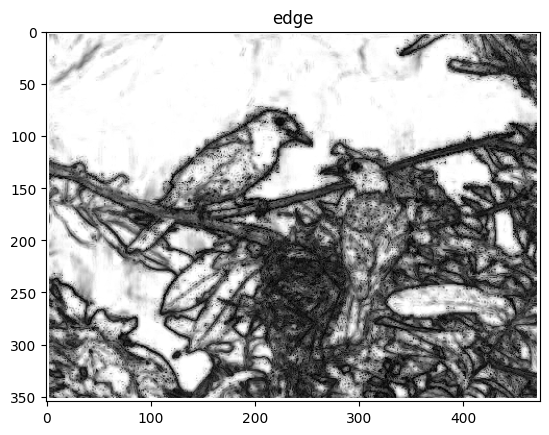

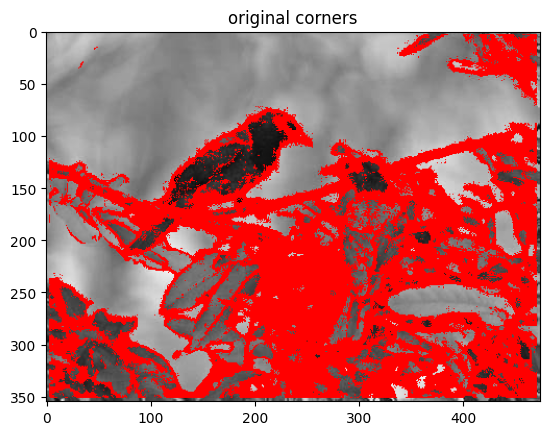

In [20]:
img_src = cv2.imread('./OIP-C.jpg',-1)
if len(img_src.shape)==3:
   img_src = cv2.cvtColor(img_src,cv2.COLOR_BGR2GRAY)
corner = susan_corner_detect(img_src)

img_show = cv2.cvtColor(img_src, cv2.COLOR_GRAY2BGR)
img_show[corner != 0] = (255, 0, 0)
plt.figure()
plt.title("original corners")
plt.imshow(img_show, cmap='gray')
plt.show()

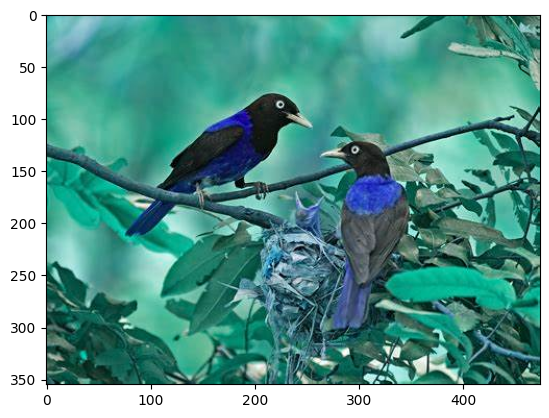

In [23]:
img_o = cv2.imread("OIP-C.jpg",1)
plt.imshow(img_o)
plt.show()

## 显示三原色

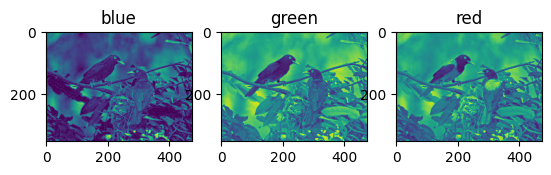

In [24]:
img_o = cv2.imread("OIP-C.jpg")
# cv2.imshow("blue", get_blue(img_o))
plt.subplot(131), plt.imshow(get_blue(img_o)), plt.title("blue")
plt.subplot(132), plt.imshow(get_green(img_o)), plt.title("green")
plt.subplot(133), plt.imshow(get_red(img_o)), plt.title("red")

plt.show()

In [15]:
def get_red(img):
    return img[:, :, 2]
def get_green(img):
    return img[:, :, 1]
def get_blue(img):
    return img[:, :, 0]